# Cricket Data(EDA)- ML+AI Class

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re
import os
import datetime as dt

In [2]:
innings=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\innings.csv')
innings.head()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.0,241,9,0,0,0,False,3,6,0,2,0,NaN,NaN
1,2,3124,2,3.95,47.2,187,10,0,0,0,True,0,2,0,2,0,NaN,NaN
2,3,3125,1,6.68,50.0,334,6,0,0,0,False,1,5,1,2,0,NaN,NaN
3,4,3125,2,3.26,40.1,131,9,0,0,0,True,1,6,0,9,0,NaN,NaN
4,5,3126,1,3.98,50.0,199,10,0,0,0,True,6,3,0,5,0,NaN,NaN


In [3]:
innings.shape

(2682, 18)

In [4]:
innings.isnull().mean()*100


id                0.00000
matchId           0.00000
inningsNumber     0.00000
runRate           0.00000
overProgress      0.00000
runs              0.00000
wkts              0.00000
ballsFaced        0.00000
fours             0.00000
sixes             0.00000
allOut            0.00000
noBallRuns        0.00000
wideRuns          0.00000
byeRuns           0.00000
legByeRuns        0.00000
penaltyRuns       0.00000
battingTeamId    77.59135
bowlingTeamId    77.59135
dtype: float64

In [5]:
innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2682 non-null   int64  
 1   matchId        2682 non-null   int64  
 2   inningsNumber  2682 non-null   int64  
 3   runRate        2682 non-null   float64
 4   overProgress   2682 non-null   float64
 5   runs           2682 non-null   int64  
 6   wkts           2682 non-null   int64  
 7   ballsFaced     2682 non-null   int64  
 8   fours          2682 non-null   int64  
 9   sixes          2682 non-null   int64  
 10  allOut         2682 non-null   bool   
 11  noBallRuns     2682 non-null   int64  
 12  wideRuns       2682 non-null   int64  
 13  byeRuns        2682 non-null   int64  
 14  legByeRuns     2682 non-null   int64  
 15  penaltyRuns    2682 non-null   int64  
 16  battingTeamId  601 non-null    float64
 17  bowlingTeamId  601 non-null    float64
dtypes: bool(

In [6]:

# Impute battingTeamId with mode
innings['battingTeamId'] = innings['battingTeamId'].fillna(innings['battingTeamId'].mode().iloc[0])

# Impute bowlingTeamId with mode
innings['bowlingTeamId'] = innings['bowlingTeamId'].fillna(innings['bowlingTeamId'].mode().iloc[0])

Innings_c=innings
Innings_c.head()



,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.0,241,9,0,0,0,False,3,6,0,2,0,155.0,155.0
1,2,3124,2,3.95,47.2,187,10,0,0,0,True,0,2,0,2,0,155.0,155.0
2,3,3125,1,6.68,50.0,334,6,0,0,0,False,1,5,1,2,0,155.0,155.0
3,4,3125,2,3.26,40.1,131,9,0,0,0,True,1,6,0,9,0,155.0,155.0
4,5,3126,1,3.98,50.0,199,10,0,0,0,True,6,3,0,5,0,155.0,155.0


In [7]:
Innings_c['inningsNumber'].nunique()

2

In [8]:
Innings_c['matchId'].nunique()

1356

In [9]:
Innings_c['bowlingTeamId'].nunique()

22

In [10]:
Innings_c['battingTeamId'].nunique()

22

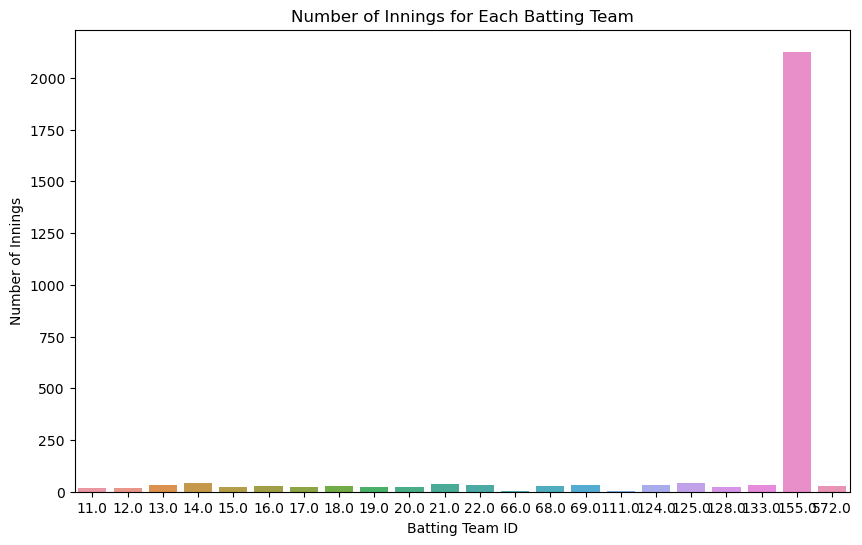

In [11]:
# Bar plot of the number of innings for each batting team
plt.figure(figsize=(10, 6))
sns.countplot(x='battingTeamId', data=Innings_c)
plt.title('Number of Innings for Each Batting Team')
plt.xlabel('Batting Team ID')
plt.ylabel('Number of Innings')
plt.show()


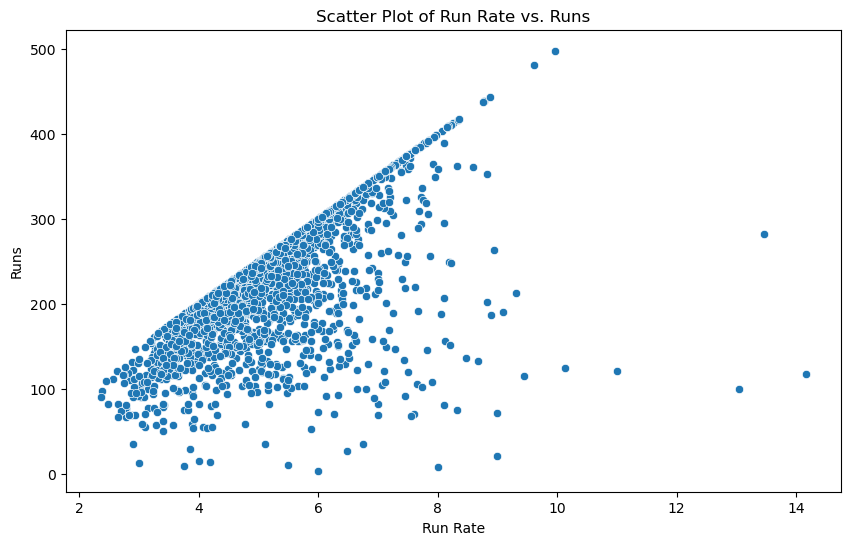

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runRate', y='runs', data=Innings_c)
plt.title('Scatter Plot of Run Rate vs. Runs')
plt.xlabel('Run Rate')
plt.ylabel('Runs')
plt.show()


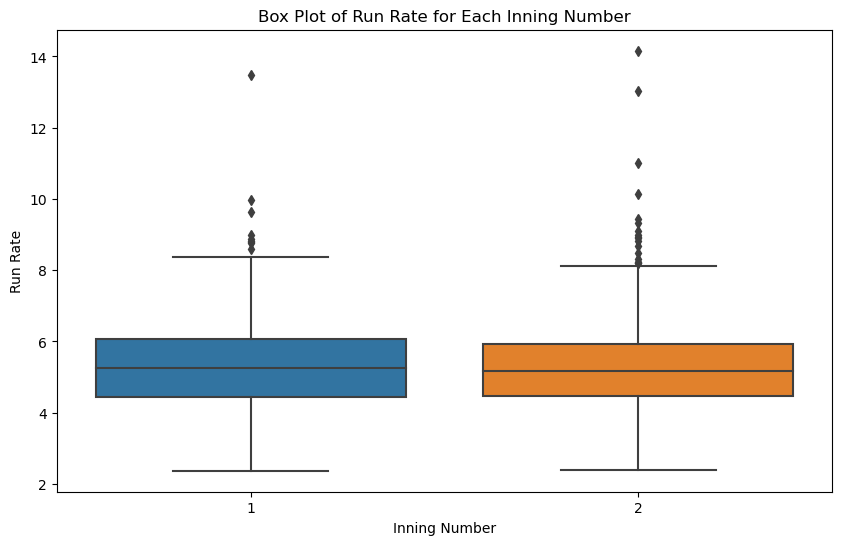

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='inningsNumber', y='runRate', data=Innings_c)
plt.title('Box Plot of Run Rate for Each Inning Number')
plt.xlabel('Inning Number')
plt.ylabel('Run Rate')
plt.show()


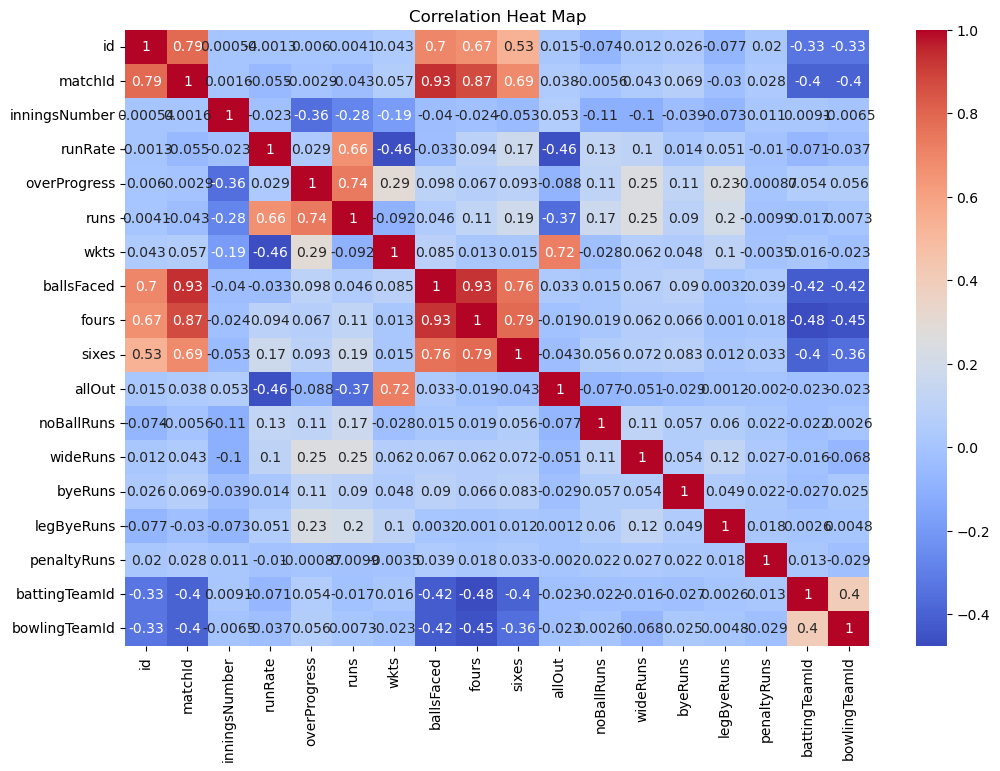

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(Innings_c.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()


In [15]:
matches=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\matches.csv')
matches.head()

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
matches.shape

(1700, 174)

In [244]:
matches.isnull().mean()*100

id                0.000000
venueId           0.000000
toss.elected      5.882353
toss.winner       5.882353
team1Id           0.000000
                   ...    
Unnamed: 169    100.000000
Unnamed: 170    100.000000
Unnamed: 171    100.000000
Unnamed: 172    100.000000
Unnamed: 173    100.000000
Length: 174, dtype: float64

In [245]:
Matches = Matches.loc[:, ~Matches.columns.str.contains('Unnamed')]

Matches.head()


,id,venueId,toss.elected,country,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,oversLimit,totalBalls,isLimitedOvers,match.summary,matchStatus,umpire.name.5,year,month,day,runRate
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11 11:00:00+00:00,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,11,NaN


In [246]:
# Assuming your DataFrame is named df
Matches.dropna(axis=True)


,id,venueId,team1Id,team2Id,matchDate,description,matchType,tournamentLabel,oversLimit,isLimitedOvers,year,month,day
0,2859,73,2808,2809,1975-06-07 11:00:00+00:00,Match 1,ODI,Prudential World Cup 1975,60,True,1975,6,7
1,2860,40,2810,2811,1975-06-07 11:00:00+00:00,Match 2,ODI,Prudential World Cup 1975,60,True,1975,6,7
2,2861,71,2812,2813,1975-06-07 11:00:00+00:00,Match 3,ODI,Prudential World Cup 1975,60,True,1975,6,7
3,2862,39,2814,2815,1975-06-07 11:00:00+00:00,Match 4,ODI,Prudential World Cup 1975,60,True,1975,6,7
4,2863,82,2816,2817,1975-06-11 11:00:00+00:00,Match 5,ODI,Prudential World Cup 1975,60,True,1975,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,102108,62,19,15,2023-09-09 11:00:00+00:00,Australia won by 123 runs,ODI,South Africa v Australia - 2023 Men's ODI Series,50,True,2023,9,9
1696,102843,100013,20,14,2023-09-10 09:30:00+00:00,India won by 228 runs,ODI,Asia Cup 2023,50,True,2023,9,10
1697,101735,72,11,16,2023-09-10 10:00:00+00:00,England won by 79 runs,ODI,England v New Zealand - 2023 Men's ODI Series,50,True,2023,9,10
1698,102844,100013,14,13,2023-09-12 09:30:00+00:00,India won by 41 runs,ODI,Asia Cup 2023,50,True,2023,9,12


## Date time extraction

In [266]:
import pandas as pd

# Assuming your DataFrame is named 'Matches'
Matches['matchDate'] = pd.to_datetime(Matches['matchDate'], format='%Y-%m-%dT%H:%M:%S%z')

# Extract year, month, and day
Matches['year'] = Matches['matchDate'].dt.year
Matches['month'] = Matches['matchDate'].dt.month
Matches['day'] = Matches['matchDate'].dt.day

# Display the updated DataFrame
print(Matches[['matchDate', 'year', 'month', 'day']])

                     matchDate  year  month  day
0    1975-06-07 11:00:00+00:00  1975      6    7
1    1975-06-07 11:00:00+00:00  1975      6    7
2    1975-06-07 11:00:00+00:00  1975      6    7
3    1975-06-07 11:00:00+00:00  1975      6    7
4    1975-06-11 11:00:00+00:00  1975      6   11
...                        ...   ...    ...  ...
1695 2023-09-09 11:00:00+00:00  2023      9    9
1696 2023-09-10 09:30:00+00:00  2023      9   10
1697 2023-09-10 10:00:00+00:00  2023      9   10
1698 2023-09-12 09:30:00+00:00  2023      9   12
1699 2023-09-12 11:00:00+00:00  2023      9   12

[1700 rows x 4 columns]


In [248]:
Matches.head()


,id,venueId,toss.elected,country,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,oversLimit,totalBalls,isLimitedOvers,match.summary,matchStatus,umpire.name.5,year,month,day,runRate
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,7,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11 11:00:00+00:00,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,60,NaN,True,NaN,NaN,NaN,1975,6,11,NaN


In [275]:


# List of columns to drop
columns_to_drop = ['totalBalls','isLimitedOvers', 'umpire.name.5']

# Filter out columns that exist in the DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in Matches.columns]

# Drop the columns
Matches = Matches.drop(columns=columns_to_drop_existing)
Matches.head()


,id,venueId,toss.elected,country,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,matchStatus_victoryMarginRuns,description,matchType,tournamentLabel,oversLimit,year,month,day,runRate,winner
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 1,ODI,Prudential World Cup 1975,60,1975,6,7,NaN,Australia
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 2,ODI,Prudential World Cup 1975,60,1975,6,7,NaN,Zealand
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 3,ODI,Prudential World Cup 1975,60,1975,6,7,NaN,England
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07 11:00:00+00:00,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 4,ODI,Prudential World Cup 1975,60,1975,6,7,NaN,Indies
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11 11:00:00+00:00,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,NaN,Match 5,ODI,Prudential World Cup 1975,60,1975,6,11,NaN,Australia


### Top wins by each team

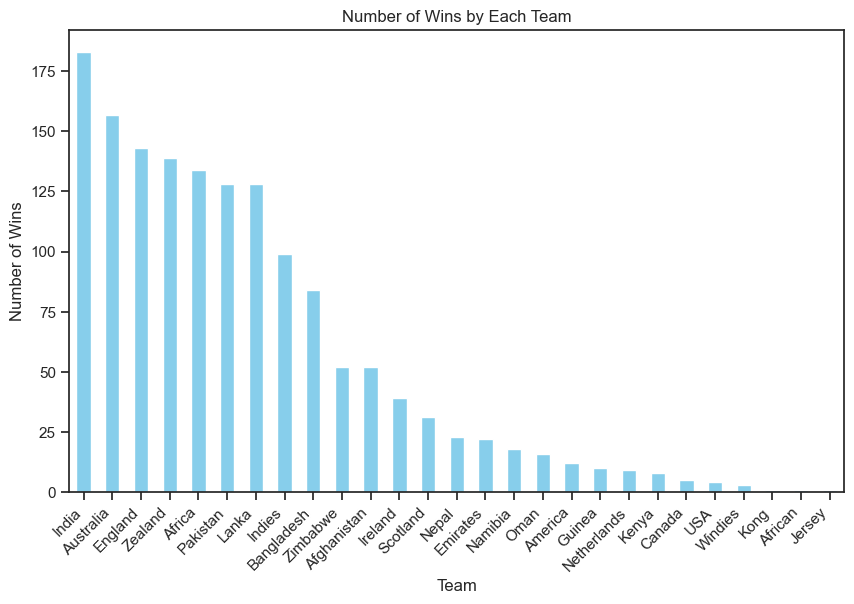

In [265]:
# Create a new column 'winner' based on matchStatus_text
Matches['winner'] = Matches['matchStatus_text'].str.extract(r'(\b\w+\b) won')

# Count the number of wins for each team
team_wins = Matches['winner'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
team_wins.plot(kind='bar', color='skyblue')
plt.title('Number of Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.show()



## Top 5 teams based on toss elected

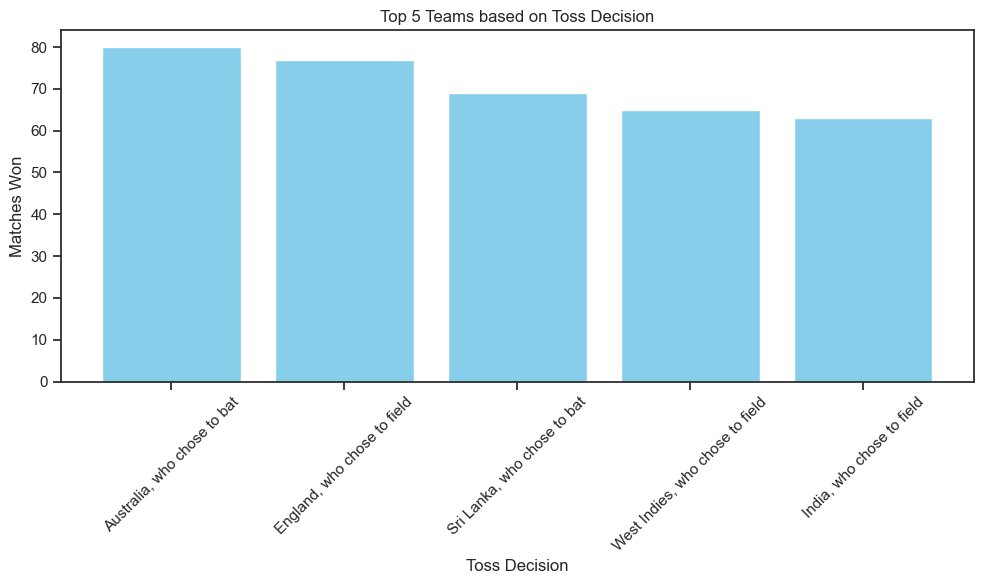

In [272]:
# Counting the number of matches won by each team based on toss.elected
matches_won_by_toss_elected = Matches.groupby('toss.elected')['matchStatus_text'].count().reset_index()
matches_won_by_toss_elected.columns = ['toss.elected', 'matchStatus_text']

# Selecting top 5 teams based on toss.elected
top_5_teams_by_toss_elected = matches_won_by_toss_elected.nlargest(5, 'matchStatus_text')

# Visualizing top 5 teams based on toss.elected
plt.figure(figsize=(10, 6))
plt.bar(top_5_teams_by_toss_elected['toss.elected'], top_5_teams_by_toss_elected['matchStatus_text'], color='skyblue')
plt.xlabel('Toss Decision')
plt.ylabel('Matches Won')
plt.title('Top 5 Teams based on Toss Decision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

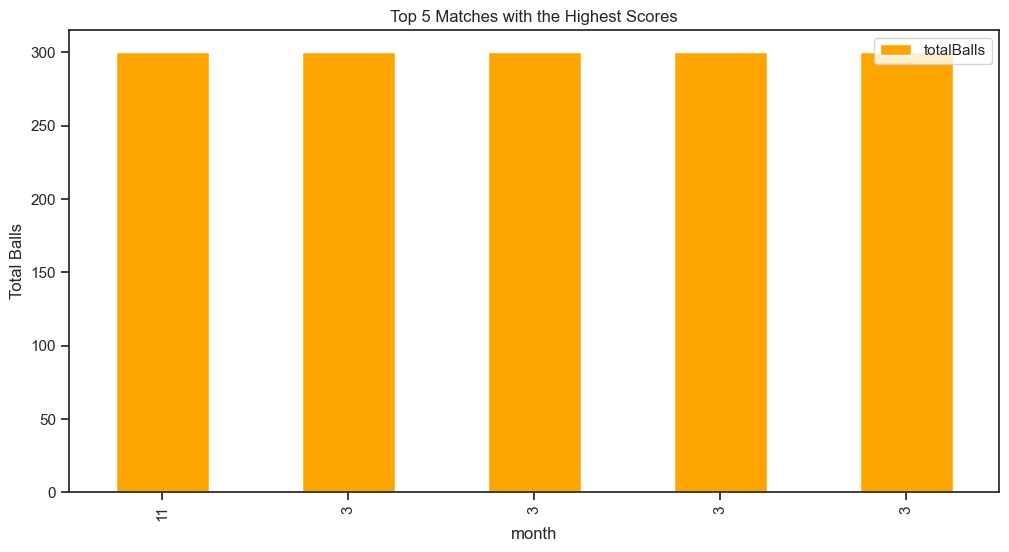

In [204]:
venue_runs = Matches('city')['runs'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='runs', y='city', data=venue_runs[:10], palette='muted')
plt.title('Total Runs Scored across Top 10 Venues')
plt.xlabel('Total Runs')
plt.ylabel('Venue')
plt.show()


### Matches played yearly

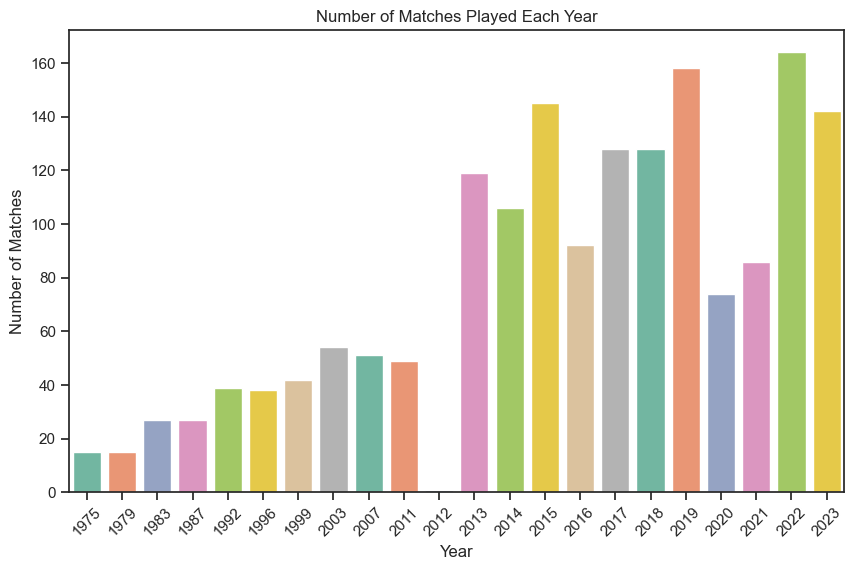

In [216]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Matches, x='year', palette='Set2')
plt.title('Number of Matches Played Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

In [25]:
overBall=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\overBallDetails.csv')
overBall.head()

,id,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId
0,1,1,1,1,5591.0,1220.0,False,84666
1,2,2,2,.,5591.0,1601.0,False,84666
2,3,3,3,.,5591.0,1601.0,False,84666
3,4,4,4,1Wd,5591.0,1601.0,False,84666
4,5,4,5,.,5591.0,1601.0,False,84666


In [26]:
overBall.shape

(157323, 8)

In [27]:
overBall.isnull().sum()

id                   0
countingBall         0
nonCountingBall      0
score                0
bowlerId           101
facingBatsmanId      3
boundary             0
overHistoryId        0
dtype: int64

In [28]:
 overBall.dropna(axis=True)
overBall.head()

,id,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId
0,1,1,1,1,5591.0,1220.0,False,84666
1,2,2,2,.,5591.0,1601.0,False,84666
2,3,3,3,.,5591.0,1601.0,False,84666
3,4,4,4,1Wd,5591.0,1601.0,False,84666
4,5,4,5,.,5591.0,1601.0,False,84666


In [29]:
overBall.columns

Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')

In [30]:
overBall['bowlerId'].nunique()

403

In [31]:
overBall.describe()

,id,countingBall,nonCountingBall,bowlerId,facingBatsmanId,overHistoryId
count,157323.000000,157323.000000,157323.000000,157222.000000,157320.000000,157323.000000
mean,78662.000000,3.491250,3.587651,22613.118635,21503.434389,97540.009452
std,45415.382537,1.708686,1.785653,36482.686712,36487.190850,7434.830042
min,1.000000,1.000000,1.000000,8.000000,8.000000,84666.000000
25%,39331.500000,2.000000,2.000000,1652.000000,1417.000000,91097.000000
50%,78662.000000,3.000000,4.000000,3746.000000,3006.000000,97546.000000
75%,117992.500000,5.000000,5.000000,19469.000000,18847.000000,103976.000000
max,157323.000000,7.000000,11.000000,103869.000000,104808.000000,110411.000000


In [32]:
overHistory=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\overHistory.csv')
overHistory.head()

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_29872\2977443859.py:1: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  overHistory=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\overHistory.csv')


,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,id,inningId,ovBalls/7,ovBalls/8,ovBalls/9,ovBalls/10,ovBalls/11,ovBalls/12,ovBalls/13,bowlerId
0,1,1,.,.,.,1Wd,.,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,.,.,.,1,1,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,W,1,.,1Nb,.,.,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1Nb,.,.,.,4,.,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,.,.,4,.,.,.,NaN,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
overHistory.shape

(110411, 18)

In [34]:
overHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ovNo        110411 non-null  int64  
 1   ovBalls/0   110411 non-null  object 
 2   ovBalls/1   110164 non-null  object 
 3   ovBalls/2   109906 non-null  object 
 4   ovBalls/3   109665 non-null  object 
 5   ovBalls/4   109405 non-null  object 
 6   ovBalls/5   108996 non-null  object 
 7   ovBalls/6   14563 non-null   object 
 8   id          110411 non-null  int64  
 9   inningId    110411 non-null  int64  
 10  ovBalls/7   1998 non-null    object 
 11  ovBalls/8   278 non-null     object 
 12  ovBalls/9   45 non-null      object 
 13  ovBalls/10  9 non-null       object 
 14  ovBalls/11  2 non-null       object 
 15  ovBalls/12  1 non-null       object 
 16  ovBalls/13  1 non-null       object 
 17  bowlerId    25729 non-null   float64
dtypes: float64(1), int64(3), object(14)
memory u

In [35]:
overHistory.isnull().mean()*100


ovNo           0.000000
ovBalls/0      0.000000
ovBalls/1      0.223710
ovBalls/2      0.457382
ovBalls/3      0.675657
ovBalls/4      0.911141
ovBalls/5      1.281575
ovBalls/6     86.810191
id             0.000000
inningId       0.000000
ovBalls/7     98.190398
ovBalls/8     99.748213
ovBalls/9     99.959243
ovBalls/10    99.991849
ovBalls/11    99.998189
ovBalls/12    99.999094
ovBalls/13    99.999094
bowlerId      76.697068
dtype: float64

In [36]:
# Specify the columns to be dropped
columns_to_drop = ['ovBalls/6', 'ovBalls/7', 'ovBalls/8', 'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12', 'ovBalls/13']

# Filter out columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in overHistory.columns]

# Drop the specified columns
OverHistory = overHistory.drop(columns=columns_to_drop)


In [37]:
# Impute missing values in numeric columns with the mean
numeric_columns = ['ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4', 'ovBalls/5', 'bowlerId']
OverHistory[numeric_columns] = OverHistory[numeric_columns].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
OverHistory[numeric_columns] = OverHistory[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Print updated info
print(OverHistory.info())


OverHistory_c=OverHistory
OverHistory_c.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ovNo       110411 non-null  int64  
 1   ovBalls/0  110411 non-null  object 
 2   ovBalls/1  110411 non-null  float64
 3   ovBalls/2  110411 non-null  float64
 4   ovBalls/3  110411 non-null  float64
 5   ovBalls/4  110411 non-null  float64
 6   ovBalls/5  110411 non-null  float64
 7   id         110411 non-null  int64  
 8   inningId   110411 non-null  int64  
 9   bowlerId   110411 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 8.4+ MB
None


,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,id,inningId,bowlerId
0,1,1,1.805535,1.824808,1.828014,1.803328,1.767714,1,1,22568.645381
1,2,1,1.805535,1.824808,1.828014,1.000000,1.000000,2,1,22568.645381
2,3,1,1.805535,1.000000,1.828014,1.803328,1.767714,3,1,22568.645381
3,4,4,1.805535,1.824808,1.828014,1.803328,4.000000,4,1,22568.645381
4,5,.,1.805535,4.000000,1.828014,1.803328,1.767714,5,1,22568.645381


In [38]:
OverHistory_c.isnull().sum()

ovNo         0
ovBalls/0    0
ovBalls/1    0
ovBalls/2    0
ovBalls/3    0
ovBalls/4    0
ovBalls/5    0
id           0
inningId     0
bowlerId     0
dtype: int64

In [39]:
OverHistory_c['inningId'].nunique()

2506

In [40]:
OverHistory_c['bowlerId'].nunique()

402

In [41]:
OverHistory_c.describe()

,ovNo,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,id,inningId,bowlerId
count,110411.000000,110411.000000,110411.000000,110411.000000,110411.000000,110411.000000,110411.000000,110411.000000,110411.000000
mean,23.455326,1.805535,1.824808,1.828014,1.803328,1.767714,55206.000000,1316.441722,22568.645381
std,13.816605,0.923876,0.931142,0.929834,0.914111,0.887577,31873.054623,784.593358,17596.621917
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
25%,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27603.500000,638.000000,22568.645381
50%,23.000000,1.805535,1.824808,1.828014,1.803328,1.767714,55206.000000,1277.000000,22568.645381
75%,35.000000,1.805535,1.824808,1.828014,1.803328,1.767714,82808.500000,2009.000000,22568.645381
max,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,110411.000000,2682.000000,103869.000000


In [42]:
import pandas as pd

Over_ball_history = pd.merge(overBall, OverHistory_c, on='bowlerId').head()
Over_ball_history.head()


,id_x,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,id_y,inningId
0,1,1,1,1,5591.0,1220.0,False,84666,1,1,1.805535,1.824808,1.828014,1.803328,1.767714,84666,2082
1,1,1,1,1,5591.0,1220.0,False,84666,3,1,1.805535,1.824808,1.828014,1.803328,1.767714,84668,2082
2,1,1,1,1,5591.0,1220.0,False,84666,5,.,1.805535,1.824808,1.828014,1.803328,1.767714,84670,2082
3,1,1,1,1,5591.0,1220.0,False,84666,7,.,3.000000,1.824808,1.828014,1.803328,3.000000,84672,2082
4,1,1,1,1,5591.0,1220.0,False,84666,9,.,1.805535,1.824808,1.000000,2.000000,1.767714,84674,2082


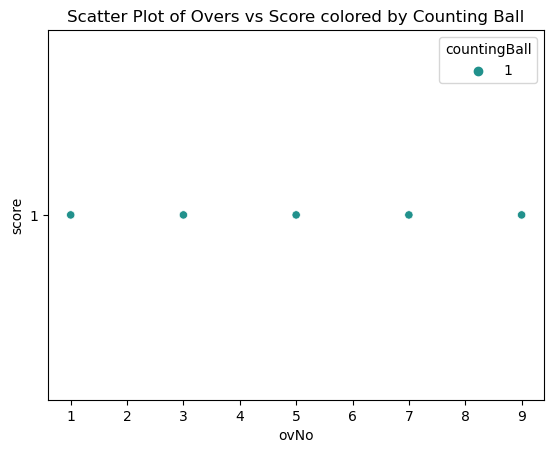

In [43]:
# Assuming 'Over_ball_history' is your merged DataFrame
scatter_data = Over_ball_history[['ovNo', 'score', 'countingBall']]
sns.scatterplot(x='ovNo', y='score', hue='countingBall', data=scatter_data, palette='viridis')
plt.title('Scatter Plot of Overs vs Score colored by Counting Ball')
plt.show()


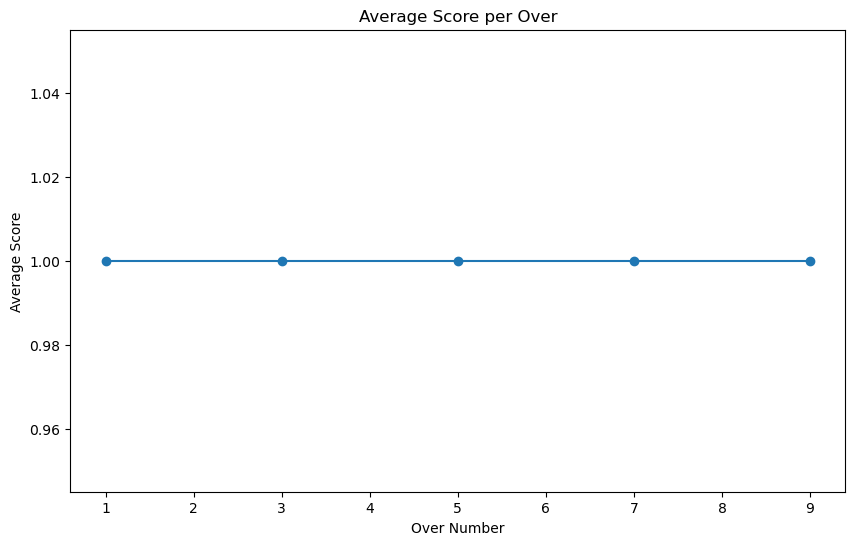

In [44]:
# Assuming 'Over_ball_history' is your merged DataFrame
line_data = Over_ball_history.groupby('ovNo')['score'].mean()
line_data.plot(kind='line', marker='o', figsize=(10, 6), title='Average Score per Over')
plt.xlabel('Over Number')
plt.ylabel('Average Score')
plt.show()


C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_29872\3436975928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_data = Over_ball_history.corr()


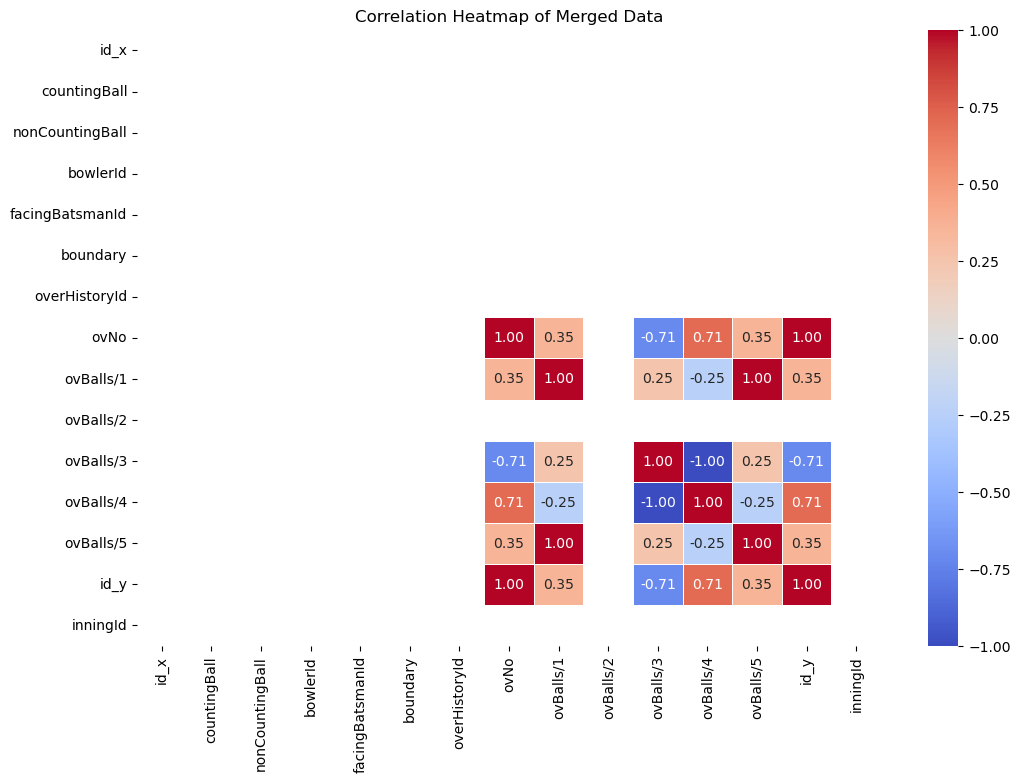

In [45]:

# Assuming 'Over_ball_history' is your merged DataFrame
heatmap_data = Over_ball_history.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Merged Data')
plt.show()



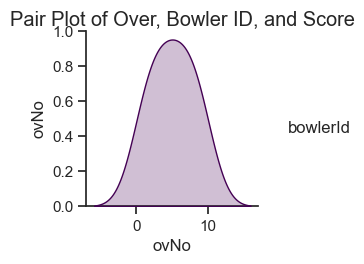

In [46]:
# Assuming 'Over_ball_history' is your merged DataFrame
pair_plot_data = Over_ball_history[['ovNo', 'bowlerId', 'score']]

# Add hue='bowlerId' to color points by bowlerId
sns.set(style="ticks")
sns.pairplot(pair_plot_data, hue='bowlerId', palette='viridis', markers='o')

plt.suptitle('Pair Plot of Over, Bowler ID, and Score', y=1.02)
plt.show()


In [47]:
players=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\players.csv')
players.head()

,id,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,NaN,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,NaN,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808


In [48]:
players.shape

(28911, 9)

In [49]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28911 entries, 0 to 28910
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28911 non-null  int64 
 1   fullName        28911 non-null  object
 2   shortName       28911 non-null  object
 3   nationality     28249 non-null  object
 4   dateOfBirth     28349 non-null  object
 5   rightArmedBowl  28911 non-null  bool  
 6   rightHandedBat  28911 non-null  bool  
 7   bowlingStyle    18328 non-null  object
 8   teamId          28911 non-null  int64 
dtypes: bool(2), int64(2), object(5)
memory usage: 1.6+ MB


In [50]:
players.isnull().mean()*100

id                 0.000000
fullName           0.000000
shortName          0.000000
nationality        2.289786
dateOfBirth        1.943897
rightArmedBowl     0.000000
rightHandedBat     0.000000
bowlingStyle      36.605444
teamId             0.000000
dtype: float64

In [51]:

# Create a new DataFrame after dropping rows with missing values
players.dropna(subset=['nationality', 'dateOfBirth']).copy()

# Impute missing values in 'bowlingStyle' with a placeholder value (e.g., 'Unknown')
players['bowlingStyle'].fillna('Unknown', inplace=True)

# Now 'players_c' contains the modified DataFrame
print(players)


           id               fullName          shortName nationality  \
0        2065          Rick McCosker        RB McCosker  Australian   
1        2114            Alan Turner           A Turner  Australian   
2        2083          Greg Chappell         G Chappell  Australian   
3        2115           Jeff Thomson          J Thomson  Australian   
4        2020           Ian Chappell         I Chappell  Australian   
...       ...                    ...                ...         ...   
28906    1527           Nikhil Dutta            N Dutta          CA   
28907  102982           Pargat Singh           PS Singh          CA   
28908   13716      Ravinderpal Singh  Ravinderpal Singh          CA   
28909    2770         Saad Bin Zafar     Saad Bin Zafar          CA   
28910  102866  Srimantha Wijeyeratne     SA Wijeyeratne          CA   

      dateOfBirth  rightArmedBowl  rightHandedBat bowlingStyle  teamId  
0      1946-12-11           False            True      Unknown    2808  
1

In [52]:

players.rename(columns={'nationality': 'country'}, inplace=True)

# Now the column is renamed
players

,id,fullName,shortName,country,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,Unknown,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,Unknown,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808
...,...,...,...,...,...,...,...,...,...
28906,1527,Nikhil Dutta,N Dutta,CA,1994-10-13,True,True,Unknown,66
28907,102982,Pargat Singh,PS Singh,CA,1992-04-13,True,True,Unknown,66
28908,13716,Ravinderpal Singh,Ravinderpal Singh,CA,1988-10-14,True,True,Unknown,66
28909,2770,Saad Bin Zafar,Saad Bin Zafar,CA,1986-11-10,False,False,Unknown,66


In [53]:
players['country'].nunique()

50

In [54]:
players['id'].nunique()

1911

In [55]:
players['teamId'].nunique()

2628

In [56]:
players['bowlingStyle'].nunique()

7

In [102]:
teams=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\teams.csv')
teams.head()

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
0,11,England,England,ENG,2050.0,1988.0
1,11,England,England,ENG,1996.0,2004.0
2,11,England,England,ENG,2229.0,2096.0
3,11,England,England,ENG,2222.0,2226.0
4,11,England,England,ENG,2330.0,2169.0


In [103]:
teams.shape

(354, 6)

In [104]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              354 non-null    int64  
 1   fullName        354 non-null    object 
 2   shortName       354 non-null    object 
 3   abbreviation    354 non-null    object 
 4   wicketKeeperId  347 non-null    float64
 5   captainId       348 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.7+ KB


In [105]:
teams.isnull().mean()*100

id                0.000000
fullName          0.000000
shortName         0.000000
abbreviation      0.000000
wicketKeeperId    1.977401
captainId         1.694915
dtype: float64

In [108]:
numeric_columns_with_missing = ['wicketKeeperId', 'captainId']

# Impute missing values in numeric columns with the mean
for column in numeric_columns_with_missing:
    teams[column].fillna(teams[column].median(), inplace=True)

# Print updated info
print(teams.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              354 non-null    int64  
 1   fullName        354 non-null    object 
 2   shortName       354 non-null    object 
 3   abbreviation    354 non-null    object 
 4   wicketKeeperId  354 non-null    float64
 5   captainId       354 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.7+ KB
None


In [111]:

teams.columns

Index(['id', 'fullName', 'shortName', 'abbreviation', 'wicketKeeperId',
       'captainId'],
      dtype='object')

In [112]:
teams['id'].nunique()

26

In [113]:
teams['fullName'].nunique()

26

In [114]:
teams.describe()

,id,wicketKeeperId,captainId
count,354.000000,3.540000e+02,354.000000
mean,43.528249,2.880511e+04,13339.485876
std,79.050280,1.462257e+05,68797.946181
min,11.000000,1.000000e+00,1.000000
25%,14.000000,5.910000e+02,361.000000
50%,18.000000,1.670000e+03,1143.000000
75%,22.000000,2.462000e+03,2306.000000
max,572.000000,1.159641e+06,585083.000000


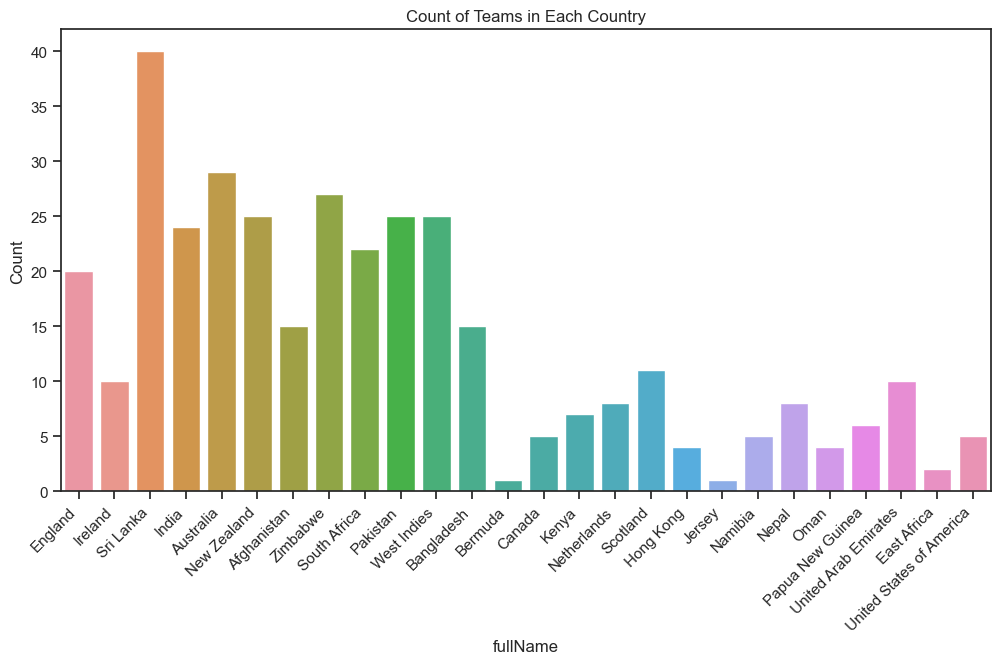

In [117]:
plt.figure(figsize=(12, 6))
sns.countplot(x='fullName', data=teams)
plt.title('Count of Teams in Each Country')
plt.xlabel('fullName')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


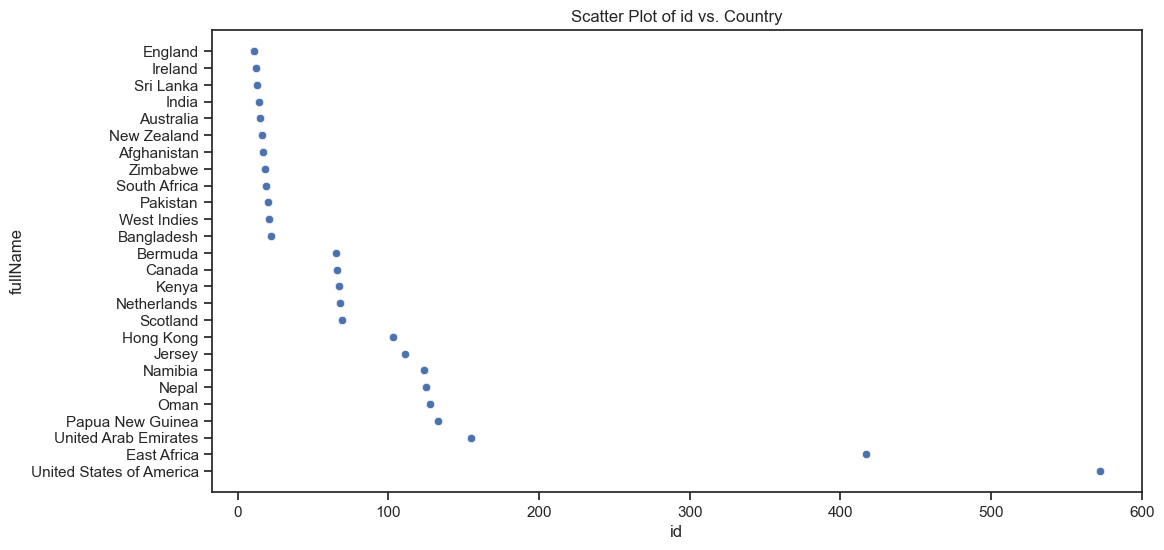

In [119]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='id', y='fullName', data=teams)
plt.title('Scatter Plot of id vs. Country')
plt.xlabel('id')
plt.ylabel('fullName')
plt.show()


## Merged two tables by column country

In [140]:

# Assuming you have DataFrames named 'players' and 'teams'
players_team = pd.merge(players, teams, left_on='country', right_on='fullName')



In [164]:
teams['fullName'].value_counts()

Sri Lanka                   40
Australia                   29
Zimbabwe                    27
Pakistan                    25
New Zealand                 25
West Indies                 25
India                       24
South Africa                22
England                     20
Afghanistan                 15
Bangladesh                  15
Scotland                    11
United Arab Emirates        10
Ireland                     10
Netherlands                  8
Nepal                        8
Kenya                        7
Papua New Guinea             6
Namibia                      5
Canada                       5
United States of America     5
Oman                         4
Hong Kong                    4
East Africa                  2
Jersey                       1
Bermuda                      1
Name: fullName, dtype: int64

In [165]:
players['country'].value_counts()

Indian           2851
Sri Lankan       2783
Australian       2593
Pakistani        2483
English          2478
South African    2309
New Zealander    2303
West Indian      2074
Zimbabwean       1933
Bangladeshi      1554
Irish            1073
Afghan            953
Scottish          424
Kenyan            365
Emirati           340
Dutch             304
Papuan            189
Namibian          157
Nepalese          112
Omani             109
American          108
Canadian          104
Hong Konger        99
Barbados           92
Trinidadian        81
Jamaican           66
Guyanan            63
Bermudian          31
Antiguan           25
Dominican          22
Zambian            21
Egyptian           20
Nevis              18
JE                 11
CA                 11
SCO                10
ENG                10
PG                  9
BD                  8
IN                  7
NP                  7
PK                  7
St Kitts            6
St Vincent          6
Ugandan             6
St Lucian 

In [168]:
players_team.shape

(0, 15)

In [122]:
venues=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Cricket_Dataset\ICC Cricket World Cup\venues.csv')
venues.head()

,id,fullName,shortName,city,country
0,1,M. A. Chidambaram Stadium,Chidambaram,Chennai,India
1,2,Eden Gardens,Eden Gardens,Kolkata,India
2,3,Sawai Mansingh Stadium,Sawai Mansingh Stadium,Jaipur,India
3,4,Wankhede Stadium,Wankhede Stadium,Mumbai,India
4,5,M. Chinnaswamy Stadium,M. Chinnaswamy Stadium,Bengaluru,India


In [211]:
venues.shape

(193, 5)

In [210]:
venues['id'].unique()

array([     1,      2,      3,      4,      5,      6,      7,      8,
            9,     10,     11,     14,     17,     18,     19,     20,
           21,     22,     23,     24,     25,     26,     27,     33,
           34,     35,     36,     37,     38,     39,     40,     41,
           42,     43,     44,     45,     46,     48,     51,     52,
           53,     54,     55,     58,     62,     63,     64,     65,
           66,     68,     69,     70,     71,     72,     73,     74,
           75,     76,     77,     78,     79,     81,     82,     84,
           85,     87,     88,     89,     90,     91,     92,     93,
           94,     95,     96,     99,    100,    102,    104,    112,
          113,    114,    115,    117,    122,    123,    124,    125,
          126,    128,    131,    132,    134,    161,    175,    179,
          216,    219,    222,    223,    225,    247,    248,    249,
          250,    251,    252,    253,    254,    255,    256,    257,
      

In [209]:
venues['country'].unique()

array(['India', 'South Africa', 'Sri Lanka', 'UAE', 'England',
       'Australia', 'West Indies', 'Wales', 'Zimbabwe', 'Scotland',
       'Ireland', 'Netherlands', 'Namibia', 'New Zealand',
       'Northern Ireland', 'Bangladesh', 'Malaysia', 'Pakistan', 'Kenya',
       'Papua New Guinea', 'USA', 'Trinidad & Tobago', 'Oman', 'Nepal',
       'Qatar'], dtype=object)

In [208]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  193 non-null    object
 3   city       193 non-null    object
 4   country    193 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB


In [207]:

# Assuming 'venues' is your DataFrame
venues['shortName'].fillna(venues['shortName'].mode()[0], inplace=True)
venues['country'].fillna(venues['country'].mode()[0], inplace=True)
venues['city'].fillna(venues['city'].mode()[0], inplace=True)

In [ ]:
venues.isnull().mean()*100

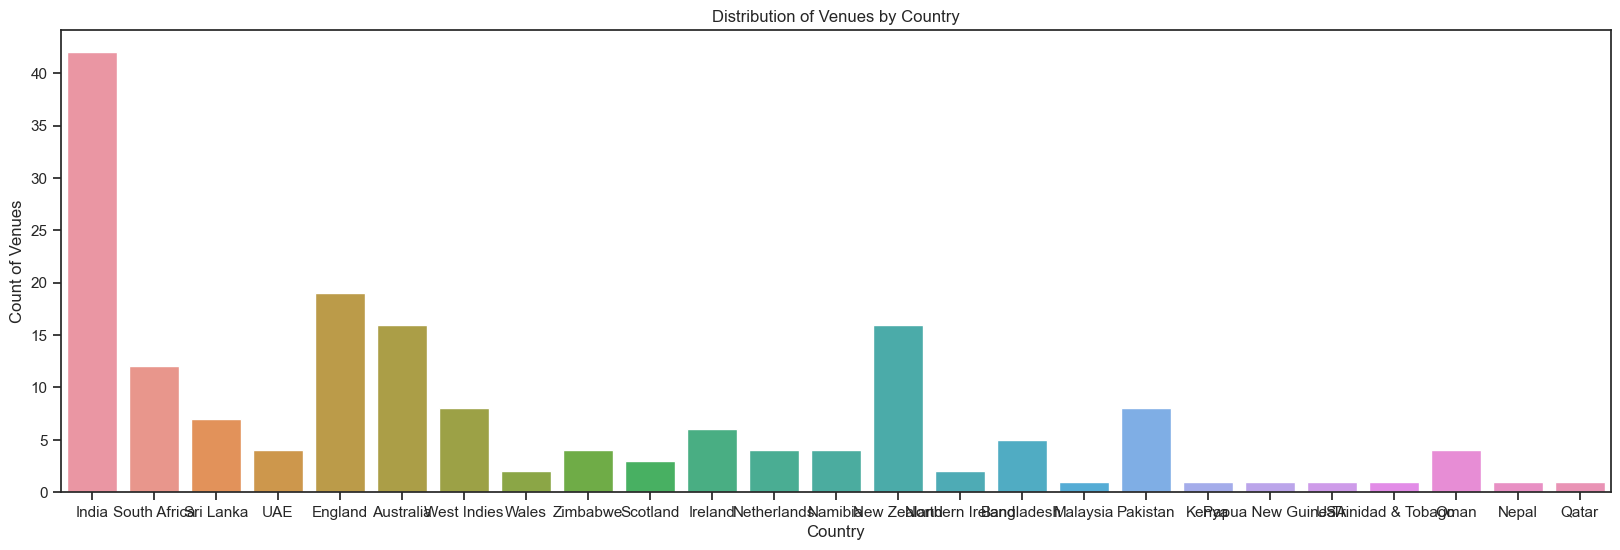

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.countplot(x='country', data=venues)
plt.title('Distribution of Venues by Country')
plt.xlabel('Country')
plt.ylabel('Count of Venues')
plt.show()


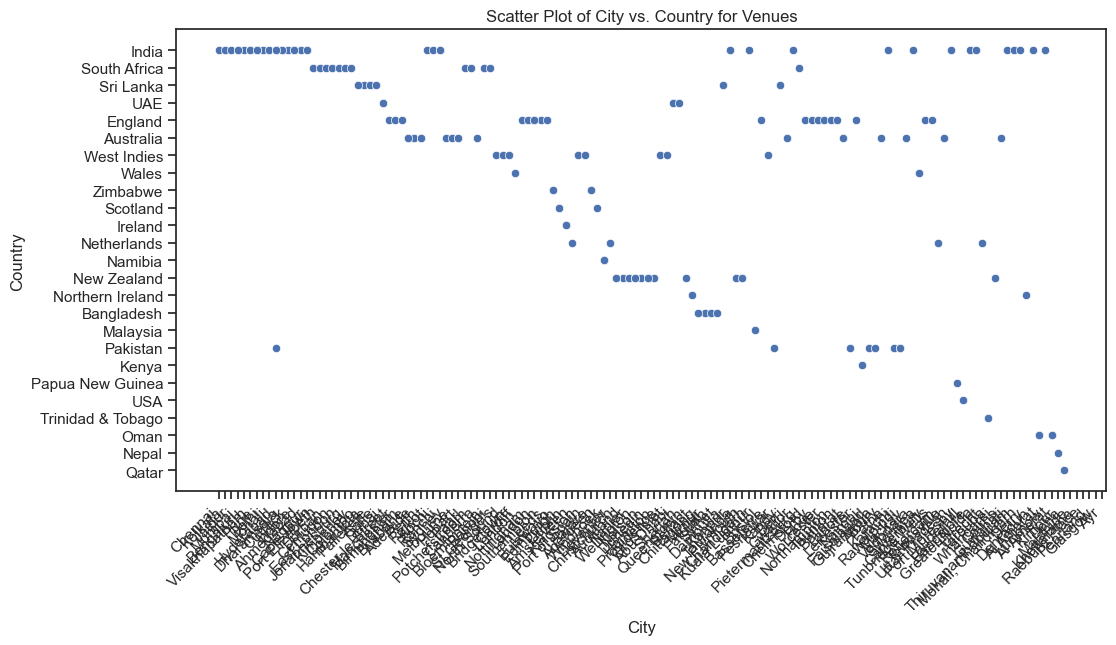

In [206]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='city', y='country', data=venues)
plt.title('Scatter Plot of City vs. Country for Venues')
plt.xlabel('City')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
